In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [0]:
import matplotlib.pyplot as plt

In [0]:
input_img = Input(shape=(28, 28, 1))

In [0]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [0]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 181us/step - loss: 0.2126 - val_loss: 0.1560
Epoch 2/50
60000/60000 [==============================] - 9s 150us/step - loss: 0.1499 - val_loss: 0.1430
Epoch 3/50
46592/60000 [======================>.......] - ETA: 1s - loss: 0.1374

60000/60000 [==============================] - 9s 149us/step - loss: 0.1362 - val_loss: 0.1279
Epoch 4/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1293 - val_loss: 0.1257
Epoch 5/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1253 - val_loss: 0.1222
Epoch 6/50
25088/60000 [===========>..................] - ETA: 4s - loss: 0.1226

60000/60000 [==============================] - 9s 147us/step - loss: 0.1222 - val_loss: 0.1186
Epoch 7/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1197 - val_loss: 0.1199
Epoch 8/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1179 - val_loss: 0.1173
Epoch 9/50
21248/60000 [=========>....................] - ETA: 5s - loss: 0.1169

60000/60000 [==============================] - 9s 146us/step - loss: 0.1162 - val_loss: 0.1111
Epoch 10/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1148 - val_loss: 0.1146
Epoch 11/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1138 - val_loss: 0.1127
Epoch 12/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1131

60000/60000 [==============================] - 9s 146us/step - loss: 0.1131 - val_loss: 0.1112
Epoch 13/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1122 - val_loss: 0.1102
Epoch 14/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1116 - val_loss: 0.1083
Epoch 15/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1114

60000/60000 [==============================] - 9s 146us/step - loss: 0.1111 - val_loss: 0.1087
Epoch 16/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1105 - val_loss: 0.1094
Epoch 17/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1099 - val_loss: 0.1089
Epoch 18/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1092

60000/60000 [==============================] - 9s 146us/step - loss: 0.1093 - val_loss: 0.1107
Epoch 19/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1090 - val_loss: 0.1099
Epoch 20/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1087 - val_loss: 0.1062
Epoch 21/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1087

60000/60000 [==============================] - 9s 147us/step - loss: 0.1083 - val_loss: 0.1108
Epoch 22/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1080 - val_loss: 0.1090
Epoch 23/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1076 - val_loss: 0.1029
Epoch 24/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1074

60000/60000 [==============================] - 9s 145us/step - loss: 0.1069 - val_loss: 0.1065
Epoch 25/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1067 - val_loss: 0.1038
Epoch 26/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.1064 - val_loss: 0.1049
Epoch 27/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1064

60000/60000 [==============================] - 9s 146us/step - loss: 0.1061 - val_loss: 0.1029
Epoch 28/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1056 - val_loss: 0.1015
Epoch 29/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1052 - val_loss: 0.1044
Epoch 30/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1050

60000/60000 [==============================] - 9s 145us/step - loss: 0.1051 - val_loss: 0.1028
Epoch 31/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1046 - val_loss: 0.1023
Epoch 32/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.1046 - val_loss: 0.1032
Epoch 33/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1043

60000/60000 [==============================] - 9s 146us/step - loss: 0.1044 - val_loss: 0.1034
Epoch 34/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1040 - val_loss: 0.1040
Epoch 35/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1039 - val_loss: 0.1034
Epoch 36/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1033

60000/60000 [==============================] - 9s 147us/step - loss: 0.1038 - val_loss: 0.1067
Epoch 37/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1034 - val_loss: 0.1044
Epoch 38/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1033 - val_loss: 0.1011
Epoch 39/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1029

60000/60000 [==============================] - 9s 147us/step - loss: 0.1031 - val_loss: 0.1030
Epoch 40/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1030 - val_loss: 0.1013
Epoch 41/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1028 - val_loss: 0.0999
Epoch 42/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1028

60000/60000 [==============================] - 9s 148us/step - loss: 0.1029 - val_loss: 0.1004
Epoch 43/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1025 - val_loss: 0.1001
Epoch 44/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1025 - val_loss: 0.1027
Epoch 45/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1018

60000/60000 [==============================] - 9s 145us/step - loss: 0.1020 - val_loss: 0.0994
Epoch 46/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.1022 - val_loss: 0.1017
Epoch 47/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1021 - val_loss: 0.1040
Epoch 48/50
19712/60000 [========>.....................] - ETA: 5s - loss: 0.1021

60000/60000 [==============================] - 9s 146us/step - loss: 0.1019 - val_loss: 0.1003
Epoch 49/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1018 - val_loss: 0.1025
Epoch 50/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1018 - val_loss: 0.0993


In [0]:
autoencoder.save('mnist_autoencoder.h5')

In [40]:
# from keras.models import load_model

layer_name = 'encoded'
encoder= Model(inputs=autoencoder.input,
               outputs=autoencoder.layers[-8].output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

In [45]:
features = encoder.predict(x_test)
print(features.shape)
flat_feat = features.reshape(10000, 4*4*8)
print(flat_feat.shape)

(10000, 4, 4, 8)
(10000, 128)


In [51]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(flat_feat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [0]:
query = np.random.choice(10000)
dist, indices = model_knn.kneighbors(flat_feat[query].reshape(1, -1),
                                     n_neighbors=3)

In [62]:
query

8059

In [63]:
indices

array([[8059, 8079, 2433]])

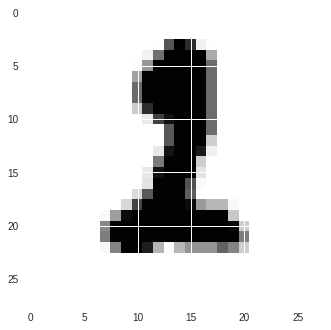

In [64]:
plt.imshow(x_test[indices[0][0]].reshape(28, 28))


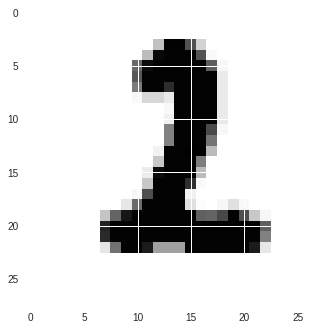

In [65]:
plt.imshow(x_test[indices[0][1]].reshape(28, 28))

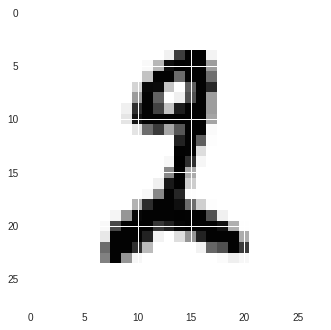

In [66]:
plt.imshow(x_test[indices[0][2]].reshape(28, 28))

In [0]:
from google.colab import files

files.download('mnist_autoencoder.h5')